In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid

In [ ]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose([transforms.ToTensor()])

# download the MNIST datasets
path = '~/datasets'
train_dataset = MNIST(path, transform=transform, download=True,train = True)
test_dataset  = MNIST(path, transform=transform, download=True, train = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 108491301.91it/s]


Extracting /root/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21516109.03it/s]

Extracting /root/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 32714563.30it/s]


Extracting /root/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3466253.41it/s]


Extracting /root/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/datasets/MNIST/raw



In [ ]:
# load data and setup device
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
total = 0
for train_x in train_loader:
     total += (train_x[0].size())[0]
print(total)

60000


In [ ]:
# examples of input images
dataiter = iter(train_loader)
# returns tuple of images and labels in current batch
current_batch = next(dataiter)
print(current_batch[0].shape)#(n_samples, n_channels, h, w)
print(current_batch[1].size())

torch.Size([128, 1, 28, 28])
torch.Size([128])


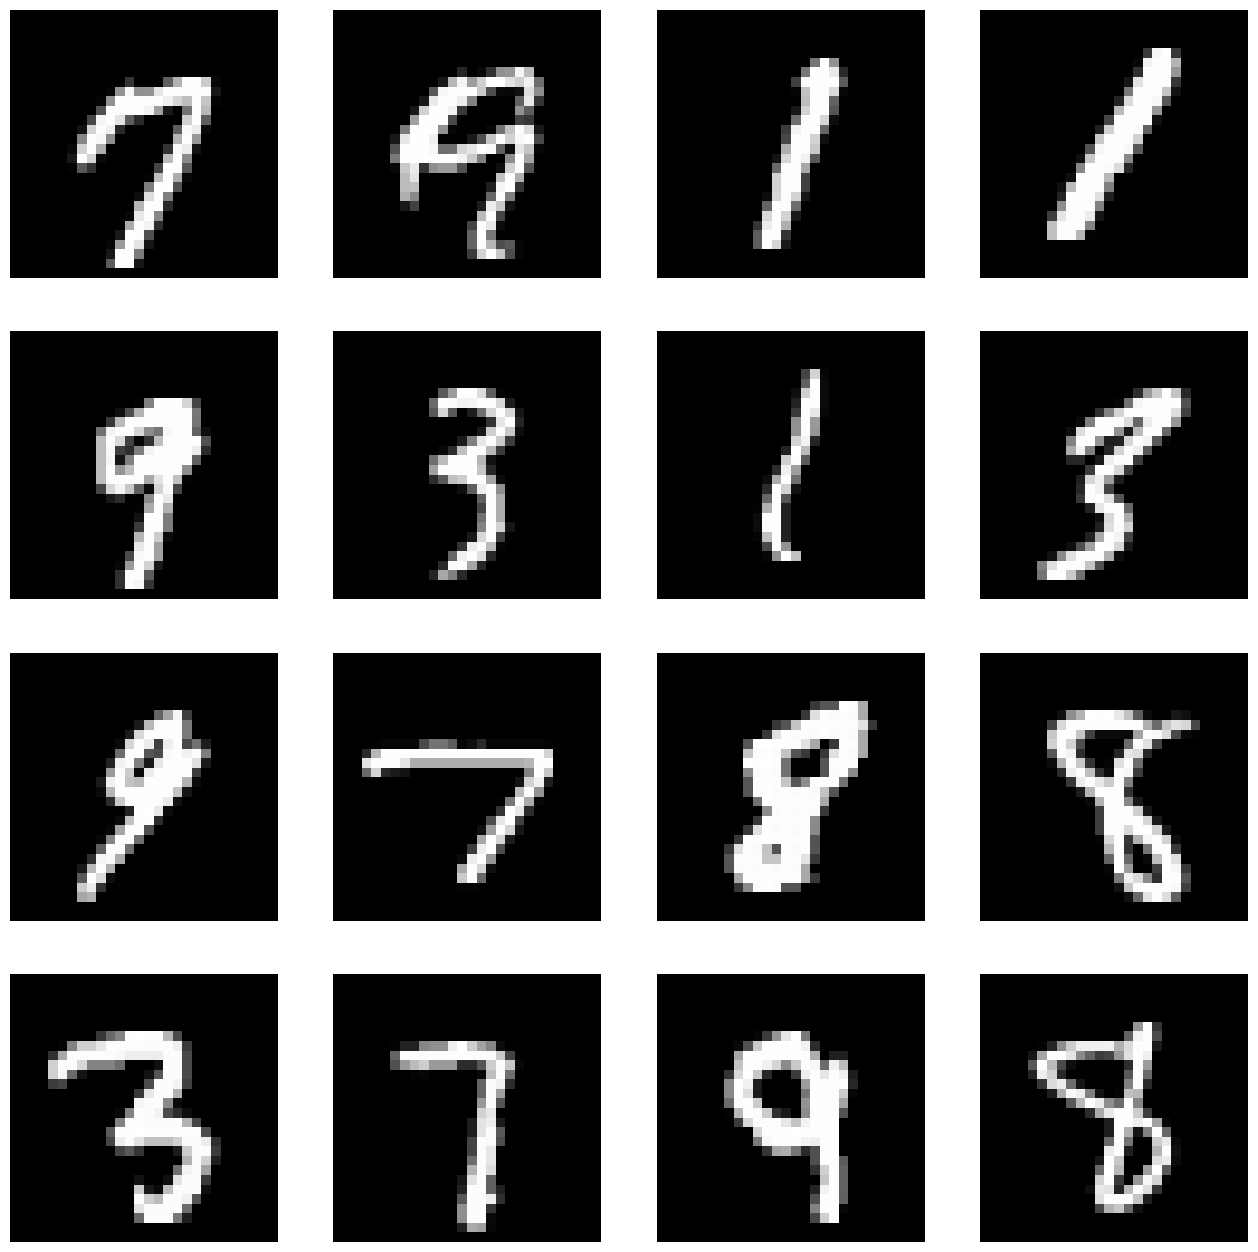

In [ ]:
images = current_batch[0]
fig,axs = plt.subplots(nrows = 4, ncols = 4,figsize = (16,16))
ax = axs.ravel()
for i in range(0,16):
        image = images[i,:,:,:]
        n_channels, height, width = image.shape
        image = image.reshape(height, width,n_channels)
        ax[i].imshow(image, vmin = 0, vmax = 1, cmap = 'gray')
        ax[i].axis('off')